#FEATURE ENGINEERING

> Add blockquote



In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

file_path = 'Train.csv'
data = pd.read_csv(file_path)

data.head()


,id,timestamp,device,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,...,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,area,target
0,Id_qt2qn56050,1624367008,pc1,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,...,13.86,0.62,1013.6,2.39,0.95,4.0,16.093,0.38979,Residential,51500000.0
1,Id_f1zf07cwb6,1624372465,pc3,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,...,14.52,0.59,1013.5,2.29,0.82,3.0,16.093,3.78322,Residential,50300000.0
2,Id_uoxdz7di5b,1624371871,pc3,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,...,14.71,0.61,1013.8,2.13,0.82,3.0,16.093,2.08425,Residential,16500000.0
3,Id_hzn8nj29gu,1624542066,pc1,-95.598750,-14.696250,-61.660000,10.726,95955.0,17.0,20.0,...,13.43,0.71,1017.9,1.97,0.99,3.0,16.093,8.80702,Avenue,46400000.0
4,Id_2kfrccrfiw,1624542798,pc1,-97.735000,-14.867500,-63.170625,10.889,83062.0,19.0,20.0,...,13.46,0.71,1017.9,1.97,0.99,3.0,16.093,2.21843,Park,50200000.0


# Handling missing values, even though XGboost handles it

In [ ]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
non_numeric_cols = data.select_dtypes(include=['object']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

print("Missing values after handling:\n", data.isnull().sum())


Missing values after handling:
 id                              0
timestamp                       0
device                          0
PCell_RSRP_max                  0
PCell_RSRQ_max                  0
PCell_RSSI_max                  0
PCell_SNR_max                   0
PCell_Downlink_Num_RBs          0
PCell_Downlink_Average_MCS      0
PCell_Downlink_bandwidth_MHz    0
PCell_Cell_Identity             0
PCell_freq_MHz                  0
SCell_RSRP_max                  0
SCell_RSRQ_max                  0
SCell_RSSI_max                  0
SCell_SNR_max                   0
SCell_Downlink_Num_RBs          0
SCell_Downlink_Average_MCS      0
SCell_Downlink_bandwidth_MHz    0
SCell_Cell_Identity             0
SCell_freq_MHz                  0
operator                        0
Latitude                        0
Longitude                       0
Altitude                        0
speed_kmh                       0
COG                             0
precipIntensity                 0
precipProbabilit

In [ ]:


if 'id' in data.columns:
    train_data = data.drop(columns=['id'])
categorical_features = ['device', 'area', 'operator'] #encoding categorically
print("Columns in the dataset:", data.columns.tolist())

train_data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True) #one hot
train_data_encoded.to_csv('train_data_encoded.csv', index=False)
train_data_encoded.head()



Columns in the dataset: ['id', 'timestamp', 'device', 'PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs', 'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz', 'PCell_Cell_Identity', 'PCell_freq_MHz', 'SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_max', 'SCell_Downlink_Num_RBs', 'SCell_Downlink_Average_MCS', 'SCell_Downlink_bandwidth_MHz', 'SCell_Cell_Identity', 'SCell_freq_MHz', 'operator', 'Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG', 'precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility', 'Traffic Jam Factor', 'area', 'target']


,id,timestamp,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_max,PCell_Downlink_Num_RBs,PCell_Downlink_Average_MCS,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,...,uvIndex,visibility,Traffic Jam Factor,target,device_pc3,area_Highway,area_Park,area_Residential,area_Tunnel,operator_2
0,Id_qt2qn56050,1624367008,-84.498750,-14.586875,-49.855625,16.457,35076.0,23.0,20.0,26368258.0,...,4.0,16.093,0.38979,51500000.0,False,False,False,True,False,False
1,Id_f1zf07cwb6,1624372465,-86.818125,-11.982500,-54.838125,16.674,42704.0,24.0,20.0,2568970.0,...,3.0,16.093,3.78322,50300000.0,True,False,False,True,False,True
2,Id_uoxdz7di5b,1624371871,-101.916250,-13.257500,-71.241250,9.392,36017.0,22.0,20.0,2824458.0,...,3.0,16.093,2.08425,16500000.0,True,False,False,True,False,True
3,Id_hzn8nj29gu,1624542066,-95.598750,-14.696250,-61.660000,10.726,95955.0,17.0,20.0,26367489.0,...,3.0,16.093,8.80702,46400000.0,False,False,False,False,False,False
4,Id_2kfrccrfiw,1624542798,-97.735000,-14.867500,-63.170625,10.889,83062.0,19.0,20.0,26369024.0,...,3.0,16.093,2.21843,50200000.0,False,False,True,False,False,False


Initially, categorical features like operator, device, and area were treated as numeric, leading to misleading correlations with the target. For example, operator was calculated as having a strong negative correlation, which was incorrect as it lacked inherent numeric meaning.

To resolve this:

I applied one-hot encoding to convert these features into binary columns, ensuring they are treated as categorical.
# These encoded features will no longer be used in the correlation matrix but will be included as categorical inputs for model training

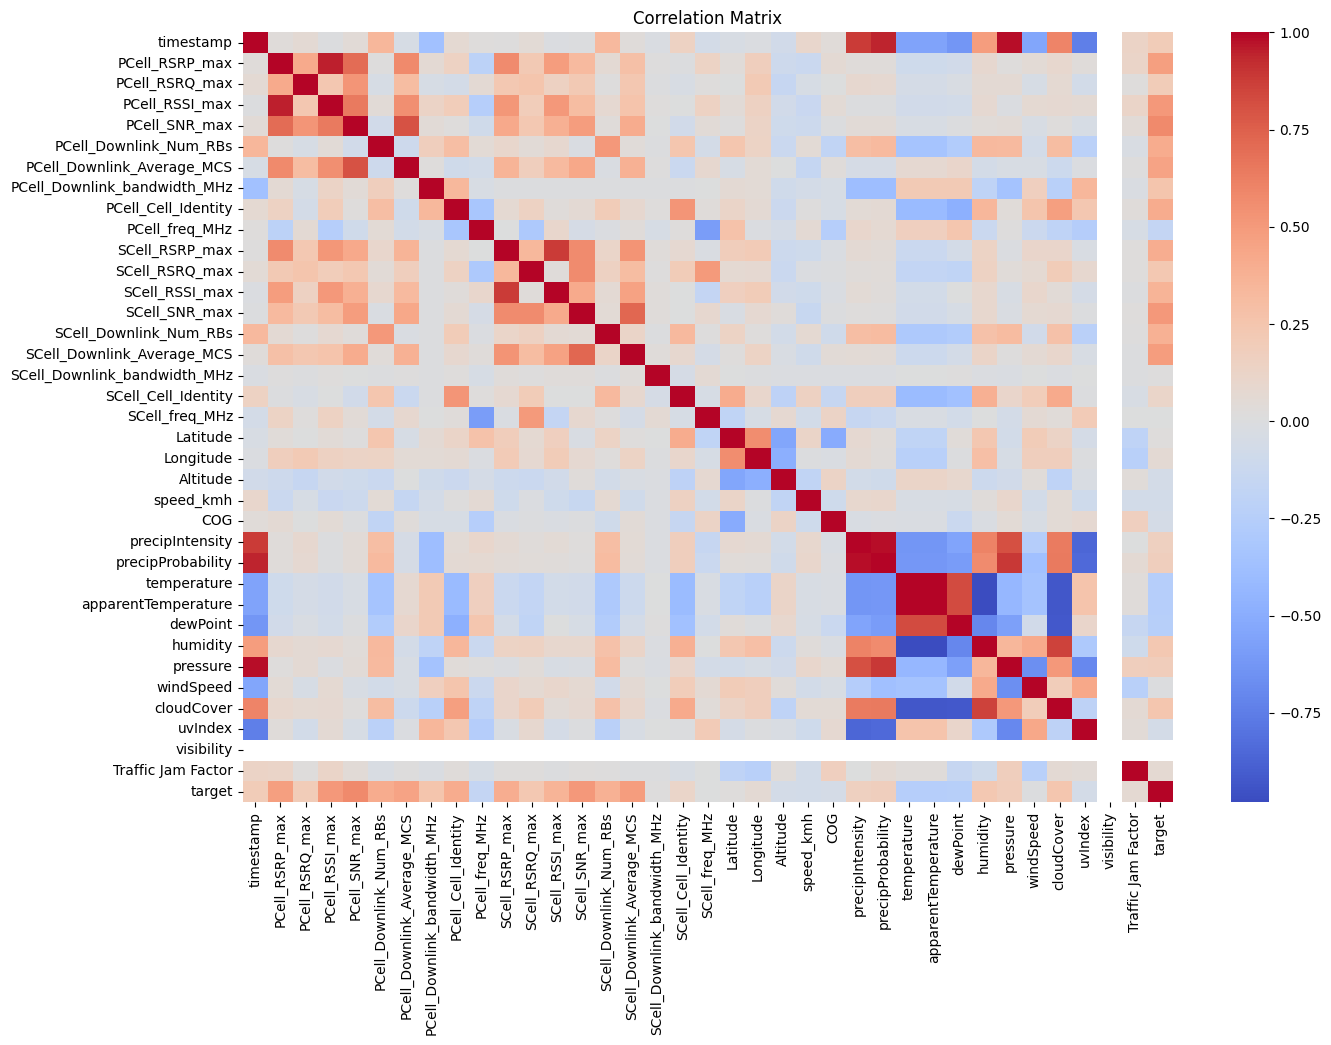

Top correlated features with target:
 target                          1.000000
PCell_SNR_max                   0.578254
SCell_SNR_max                   0.511597
PCell_RSSI_max                  0.509748
SCell_Downlink_Average_MCS      0.487332
PCell_RSRP_max                  0.476838
PCell_Downlink_Average_MCS      0.453623
PCell_Downlink_Num_RBs          0.407318
PCell_Cell_Identity             0.405961
SCell_RSRP_max                  0.396969
SCell_Downlink_Num_RBs          0.375310
SCell_RSSI_max                  0.362379
PCell_Downlink_bandwidth_MHz    0.250830
cloudCover                      0.246949
SCell_RSRQ_max                  0.231060
humidity                        0.230256
timestamp                       0.200607
PCell_RSRQ_max                  0.199297
pressure                        0.180679
precipProbability               0.179002
precipIntensity                 0.158196
SCell_Cell_Identity             0.117944
Traffic Jam Factor              0.065516
Longitude          

In [ ]:
# Selectign only numeric columns
numeric_data = train_data_encoded.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

if 'target' in numeric_data.columns:
    target_correlation = correlation_matrix['target'].sort_values(ascending=False)
    print("Top correlated features with target:\n", target_correlation)
else:
    print("Target column not found in numeric data.")


# Let's analyse any time trends

In [ ]:
# List of features to drop
features_to_drop = [
   'id', 'Latitude', 'Longitude', 'SCell_Downlink_bandwidth_MHz', 'SCell_freq_MHz',
    'windSpeed', 'COG', 'uvIndex', 'Altitude', 'speed_kmh', 'PCell_freq_MHz',
    'dewPoint', 'apparentTemperature', 'temperature','operator' ,'visibility'
]


data = data.drop(columns=features_to_drop)

print(f"Remaining features:\n{data.columns}")


Remaining features:
Index(['timestamp', 'device', 'PCell_RSRP_max', 'PCell_RSRQ_max',
       'PCell_RSSI_max', 'PCell_SNR_max', 'PCell_Downlink_Num_RBs',
       'PCell_Downlink_Average_MCS', 'PCell_Downlink_bandwidth_MHz',
       'PCell_Cell_Identity', 'SCell_RSRP_max', 'SCell_RSRQ_max',
       'SCell_RSSI_max', 'SCell_SNR_max', 'SCell_Downlink_Num_RBs',
       'SCell_Downlink_Average_MCS', 'SCell_Cell_Identity', 'precipIntensity',
       'precipProbability', 'humidity', 'pressure', 'cloudCover',
       'Traffic Jam Factor', 'area', 'target'],
      dtype='object')


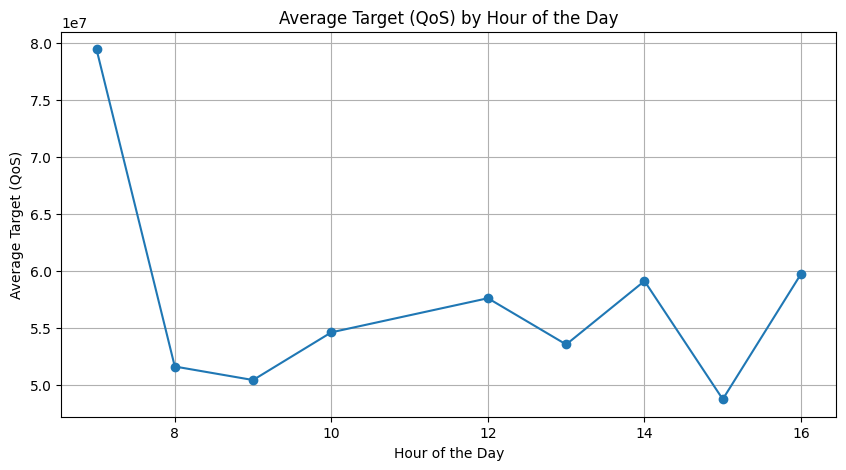

In [ ]:
#converting unix timestamp (ms from 1970 1st jan) to human-readable format
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')


train_data['hour'] = train_data['timestamp'].dt.hour
train_data['day_of_week'] = train_data['timestamp'].dt.day_name()


hourly_trend = train_data.groupby('hour')['target'].mean()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o')
plt.title('Average Target (QoS) by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Target (QoS)')
plt.grid(True)
plt.show()


In [ ]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')

#Get the start and end dates to know what dates data spans on
start_date = train_data['timestamp'].min()
end_date = train_data['timestamp'].max()

print(f"The Unix timestamps range from {start_date} to {end_date}.")


The Unix timestamps range from 2021-06-22 07:49:54 to 2021-06-24 16:59:59.


# The dataset contains only two days' worth of data (22nd and 24th June 2021), which was unexpected when attempting to explore seasonality trends. After investigating the start and end timestamps, it became clear that the dataset is very limited. While this dataset is not ideal for analyzing long-term patterns or trends, it provides a good foundation for exploring correlations and building a basic model for QoS prediction.

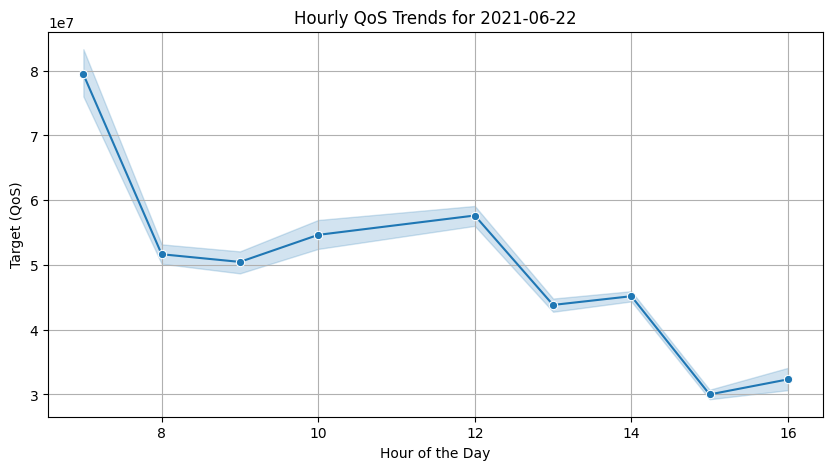

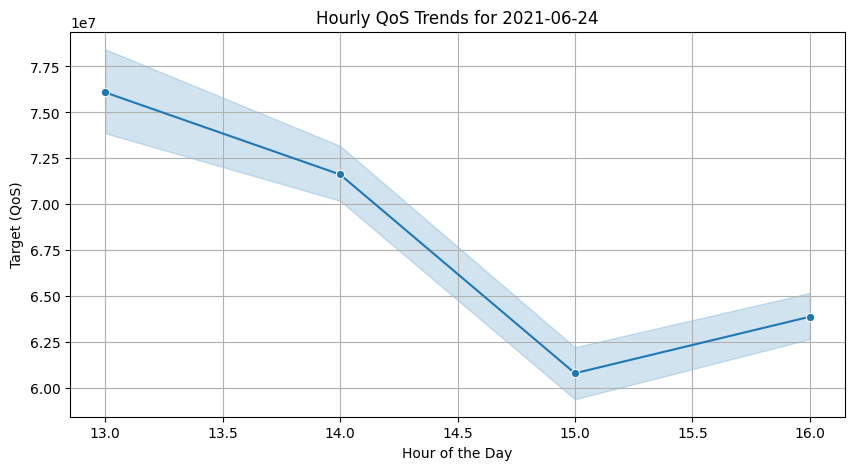

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure timestamp is in datetime format
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')

# Extract hour and date for grouping
train_data['hour'] = train_data['timestamp'].dt.hour
train_data['date'] = train_data['timestamp'].dt.date  # Extract date

# Filter for each specific date and plot separately
for specific_date in ['2021-06-22', '2021-06-24']:
    specific_date_data = train_data[train_data['date'] == pd.Timestamp(specific_date).date()]

    # Plot QoS trends for the specific date
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=specific_date_data, x='hour', y='target', marker='o')
    plt.title(f'Hourly QoS Trends for {specific_date}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Target (QoS)')
    plt.grid(True)
    plt.show()


#From the hourly QoS trends for 22nd and 24th June, it is evident that the target (QoS) fluctuates significantly over the hours. For 22nd June, QoS appears to drop sharply in the morning before stabilizing, while 24th June shows a more consistent decline through the day. The limited data restricts drawing broader conclusions, but it highlights potential dependencies on time-related factors or external conditions that could influence QoS

Key Predictors: Features like PCell_Downlink_Num_RBs, PCell_Downlink_Average_MCS, and Traffic Jam Factor show strong correlation with the target, making them important for modeling.
Redundant Features: High correlation exists among features like PCell_RSRP_max and PCell_SNR_max. Reducing redundancy (e.g., dropping one or using PCA) can improve model performance.
Low Impact Features: Features like operator, cloudCover, and environmental factors (e.g., temperature, humidity) have low correlation with the target and may be less relevant.

In [ ]:

if 'id' in data.columns:
    data = data.drop(columns=['id'])

#categorical features for encoding!
categorical_features = ['device', 'area']

#one-hot encoding for `device` and `area`
data_encoded = pd.get_dummies(data, columns=['device', 'area'], drop_first=True)


X = data_encoded.drop('target', axis=1)
y = data_encoded['target']



In [ ]:
# Train-test split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
TARGET_SCALE = 1e6

from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaler_y = StandardScaler()

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"], unit='s')  # Adjust 'unit' if needed


y = data_encoded['target'] / TARGET_SCALE
timestamps = data_encoded["timestamp"]
timestamps = pd.to_datetime(timestamps)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

#train-test split
X_train, X_test, y_train, y_test, train_timestamps, test_timestamps = train_test_split(
    X_scaled, y_scaled, timestamps, test_size=0.2, random_state=42
)

#unique dates for training and testing sets
train_dates = train_timestamps.dt.date.unique()
test_dates = test_timestamps.dt.date.unique()

print("Training Data Dates:", train_dates)
print("Testing Data Dates:", test_dates)

#  XGBoost model
import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True  #enables categorical handling
)

model.fit(X_train, y_train)





Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24) datetime.date(2021, 6, 22)]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# ERROR METRICS
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)

print(f"Mean Squared Error (Original Scale): {mse_original}")
print(f"Root Mean Squared Error (Original Scale): {rmse_original}")


mape = mean_absolute_percentage_error(y_test_original, y_pred_original) * 100
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.06042216261735816
Root Mean Squared Error: 0.24580919961905037
Mean Squared Error (Original Scale): 112.72687624577073
Root Mean Squared Error (Original Scale): 10.617291379903385
Mean Absolute Percentage Error (MAPE): 16.80%
R² Score: 0.9417


In [ ]:
# Step 1: Verify the timestamp column in the original data
print(data_encoded["timestamp"].head())

# Step 2: Convert the timestamp column to datetime (if needed)
if data_encoded["timestamp"].dtype != 'datetime64[ns]':
    data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"], unit='s')  # Adjust 'unit' as necessary

# Step 3: Perform train-test split, ensuring `timestamp` is included
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded,  # Use data with the correct timestamp column
    y,
    test_size=0.2,
    random_state=42
)

# Step 4: Extract timestamps from training and testing data
train_timestamps = X_train["timestamp"]
test_timestamps = X_test["timestamp"]

# Step 5: Get unique dates
train_dates = train_timestamps.dt.date.unique()
test_dates = test_timestamps.dt.date.unique()

print("Training Data Dates:", train_dates)
print("Testing Data Dates:", test_dates)


0   2021-06-22 13:03:28
1   2021-06-22 14:34:25
2   2021-06-22 14:24:31
3   2021-06-24 13:41:06
4   2021-06-24 13:53:18
Name: timestamp, dtype: datetime64[ns]
Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24) datetime.date(2021, 6, 22)]


#Separating Data based on time - to avoid leaks

In [ ]:
import datetime
data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

train_data = data_encoded[data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)]
test_data = data_encoded[data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)]


X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


Training Data Dates: [datetime.date(2021, 6, 22)]
Testing Data Dates: [datetime.date(2021, 6, 24)]


#Visualizing time distribution: how many hours per day, to avoid any data discrepancies

Hours covered on June 22nd: [7, 8, 9, 10, 12, 13, 14, 15, 16]
Total hours covered on June 22nd: 9
Hours covered on June 24th: [13, 14, 15, 16]
Total hours covered on June 24th: 4


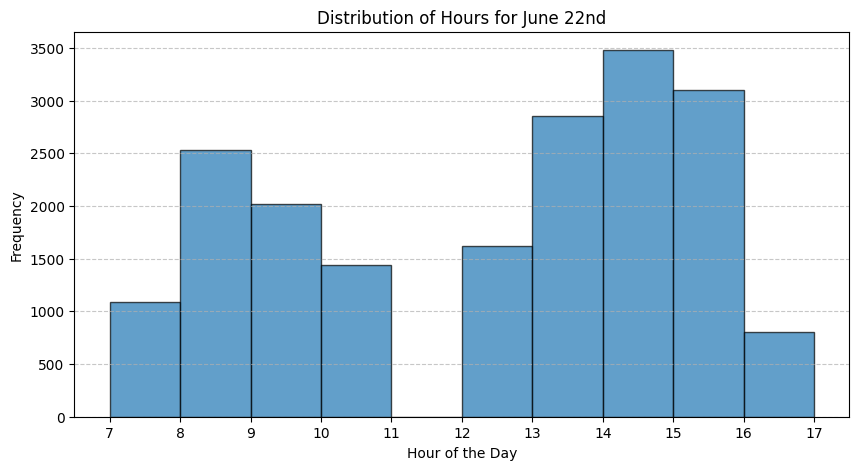

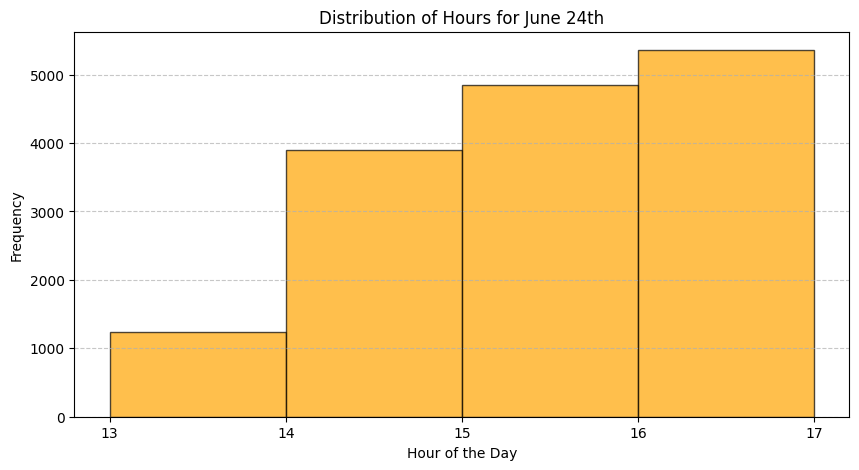

In [ ]:
import datetime

june_22_data = data_encoded[data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)]
june_22_hours = june_22_data["timestamp"].dt.hour.unique()

print("Hours covered on June 22nd:", sorted(june_22_hours))
print("Total hours covered on June 22nd:", len(june_22_hours))

june_24_data = data_encoded[data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)]
june_24_hours = june_24_data["timestamp"].dt.hour.unique()

print("Hours covered on June 24th:", sorted(june_24_hours))
print("Total hours covered on June 24th:", len(june_24_hours))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(june_22_data["timestamp"].dt.hour, bins=range(7, 18), edgecolor="black", alpha=0.7)
plt.title("Distribution of Hours for June 22nd")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.xticks(range(7, 18))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(june_24_data["timestamp"].dt.hour, bins=range(13, 18), edgecolor="black", alpha=0.7, color="orange")
plt.title("Distribution of Hours for June 24th")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.xticks(range(13, 18))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [ ]:
import datetime

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

# Define cutoff time for splitting June 24th!! #imp
cutoff_time = datetime.datetime(2021, 6, 24, 12, 0)  # Split at noon on June 24th

train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True
)

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



Training Data Dates: [datetime.date(2021, 6, 22)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 376473687105610.25
Root Mean Squared Error (RMSE): 19402929.858802516
Mean Absolute Percentage Error (MAPE): 23.52%
R² Score: 0.8458


In [ ]:
import datetime


data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

#Define cutoff time for splitting June 24th
cutoff_time = datetime.datetime(2021, 6, 24, 13, 0)  # Split at noon on June 24th

train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())

import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True  # Enables native categorical handling
)

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



Training Data Dates: [datetime.date(2021, 6, 22)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 376473687105610.25
Root Mean Squared Error (RMSE): 19402929.858802516
Mean Absolute Percentage Error (MAPE): 23.52%
R² Score: 0.8458


In [ ]:
import datetime

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

# Define cutoff time for splitting June 24th
cutoff_time = datetime.datetime(2021, 6, 24, 14, 0)  # Split at noon on June 24th

train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 321282993800656.75
Root Mean Squared Error (RMSE): 17924368.71414602
Mean Absolute Percentage Error (MAPE): 31.26%
R² Score: 0.8711


In [ ]:
import datetime

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

# Define cutoff time for splitting June 24th
cutoff_time = datetime.datetime(2021, 6, 24, 15, 0)  # Split at noon on June 24th

train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True  # Enables native categorical handling
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 241013756312987.0
Root Mean Squared Error (RMSE): 15524617.75094598
Mean Absolute Percentage Error (MAPE): 25.12%
R² Score: 0.9049


In [ ]:
import datetime

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

# Define cutoff time for splitting June 24th
cutoff_time = datetime.datetime(2021, 6, 24, 16, 0)  # Split at noon on June 24th

train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")



Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 185031278294745.9
Root Mean Squared Error (RMSE): 13602620.273121864
Mean Absolute Percentage Error (MAPE): 21.08%
R² Score: 0.9223


#Comparative table for different train test splits.

In [ ]:
import pandas as pd
from tabulate import tabulate

data_updated = {
    "Train Data Hours": [9, 10, 11, 12, 9],  # 9 from June 22nd + variable hours from June 24th
    "Prediction Hours (Test Data)": [4, 3, 2, 1, 4],  # Based on June 24th
    "MSE (Scaled by 1e16)": [
        376473687105610.25 / 1e16,
        321282993800656.75 / 1e16,
        241013756312987.0 / 1e16,
        185031278294745.9 / 1e16,
        376473687105610.25 / 1e16,
    ],
    "RMSE (Scaled by 1e16)": [
        19402929.858802516 / 1e16,
        17924368.71414602 / 1e16,
        15524617.75094598 / 1e16,
        13602620.273121864 / 1e16,
        19402929.858802516 / 1e16,
    ],
    "MAPE (%)": [23.52, 31.26, 25.12, 21.08, 23.52],
    "R² Score": [0.8458, 0.8711, 0.9049, 0.9223, 0.8458],
}


df_updated = pd.DataFrame(data_updated)
table = tabulate(df_updated, headers='keys', tablefmt='grid', showindex=False)
print(table)


+--------------------+--------------------------------+------------------------+-------------------------+------------+------------+
|   Train Data Hours |   Prediction Hours (Test Data) |   MSE (Scaled by 1e16) |   RMSE (Scaled by 1e16) |   MAPE (%) |   R² Score |
+====================+================================+========================+=========================+============+============+
|                  9 |                              4 |              0.0376474 |             1.94029e-09 |      23.52 |     0.8458 |
+--------------------+--------------------------------+------------------------+-------------------------+------------+------------+
|                 10 |                              3 |              0.0321283 |             1.79244e-09 |      31.26 |     0.8711 |
+--------------------+--------------------------------+------------------------+-------------------------+------------+------------+
|                 11 |                              2 |              

#FINAL : Training till 2pm on 24th June (Day 2)



Training Data Dates: [datetime.date(2021, 6, 22) datetime.date(2021, 6, 24)]
Testing Data Dates: [datetime.date(2021, 6, 24)]
Mean Squared Error (MSE): 321282993800656.75
Root Mean Squared Error (RMSE): 17924368.71414602
Mean Absolute Percentage Error (MAPE): 31.26%
R² Score: 0.8711


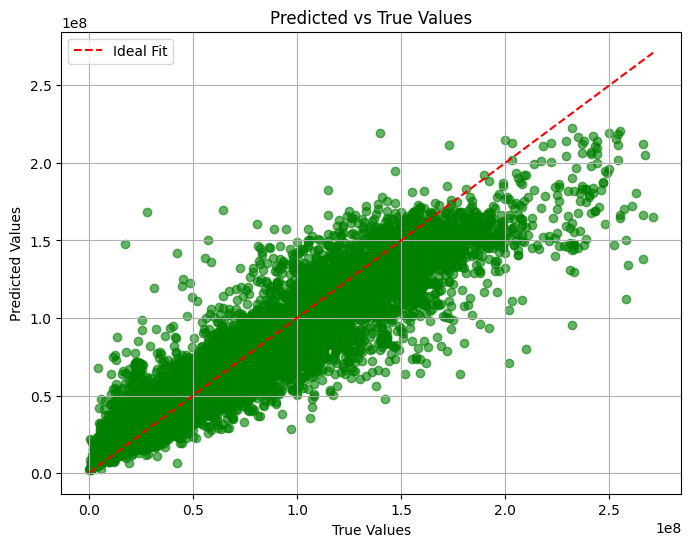

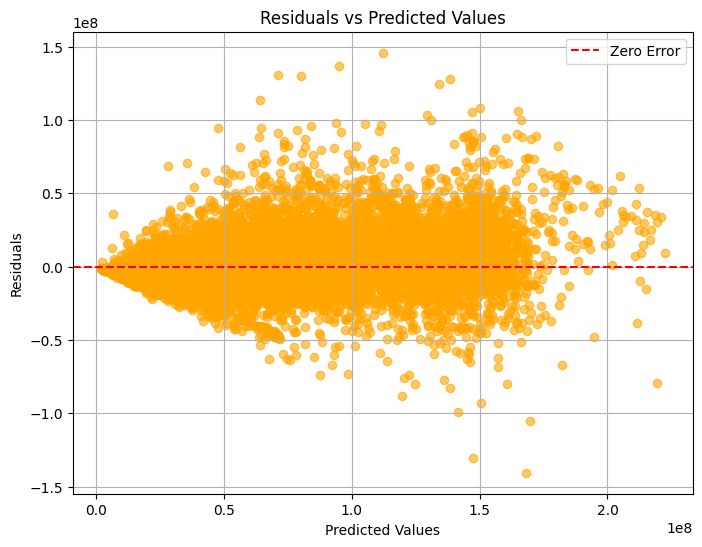

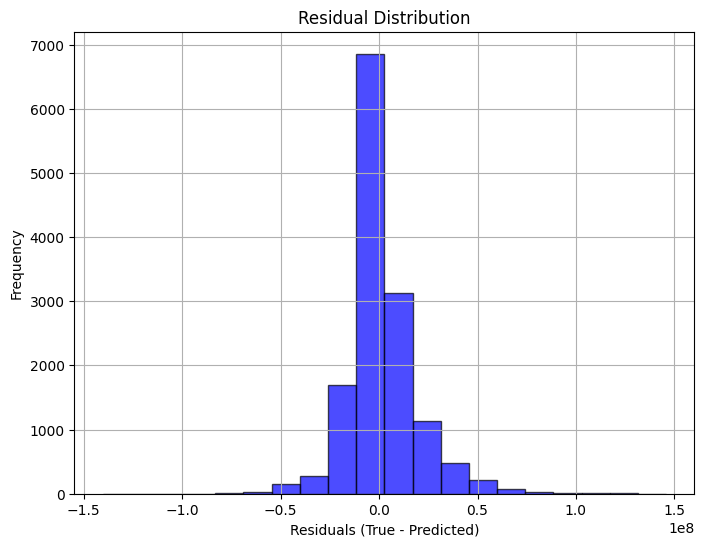

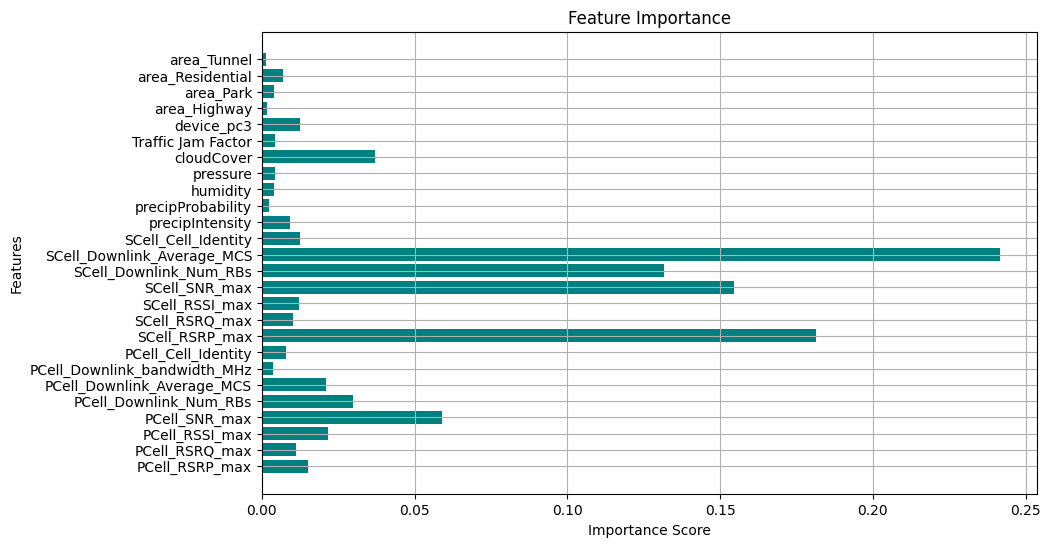

In [ ]:
import datetime

data_encoded["timestamp"] = pd.to_datetime(data_encoded["timestamp"])

# Define cutoff time for splitting June 24th
cutoff_time = datetime.datetime(2021, 6, 24, 14, 0)


#final dataset
train_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 22)) |
    ((data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
     (data_encoded["timestamp"] < cutoff_time))
]

test_data = data_encoded[
    (data_encoded["timestamp"].dt.date == datetime.date(2021, 6, 24)) &
    (data_encoded["timestamp"] >= cutoff_time)
]

X_train = train_data.drop(columns=["target", "timestamp"])
y_train = train_data["target"]

X_test = test_data.drop(columns=["target", "timestamp"])
y_test = test_data["target"]

print("Training Data Dates:", train_data["timestamp"].dt.date.unique())
print("Testing Data Dates:", test_data["timestamp"].dt.date.unique())


import xgboost as xgb
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    enable_categorical=True  # Enables native categorical handling
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

# plot for predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Ideal Fit")
plt.title("Predicted vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

#Residuals vs Predicted Values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="orange")
plt.axhline(0, linestyle="--", color="red", label="Zero Error")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

#Residual Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color="blue", alpha=0.7, edgecolor="black")
plt.title("Residual Distribution")
plt.xlabel("Residuals (True - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#Feature Importance Plot
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance, color="teal")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()



<ipython-input-36-cccbb96c90cf>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  complete_time_series = pd.concat([time_series_train_df, time_series_test_df]).sort_values(by="timestamp")


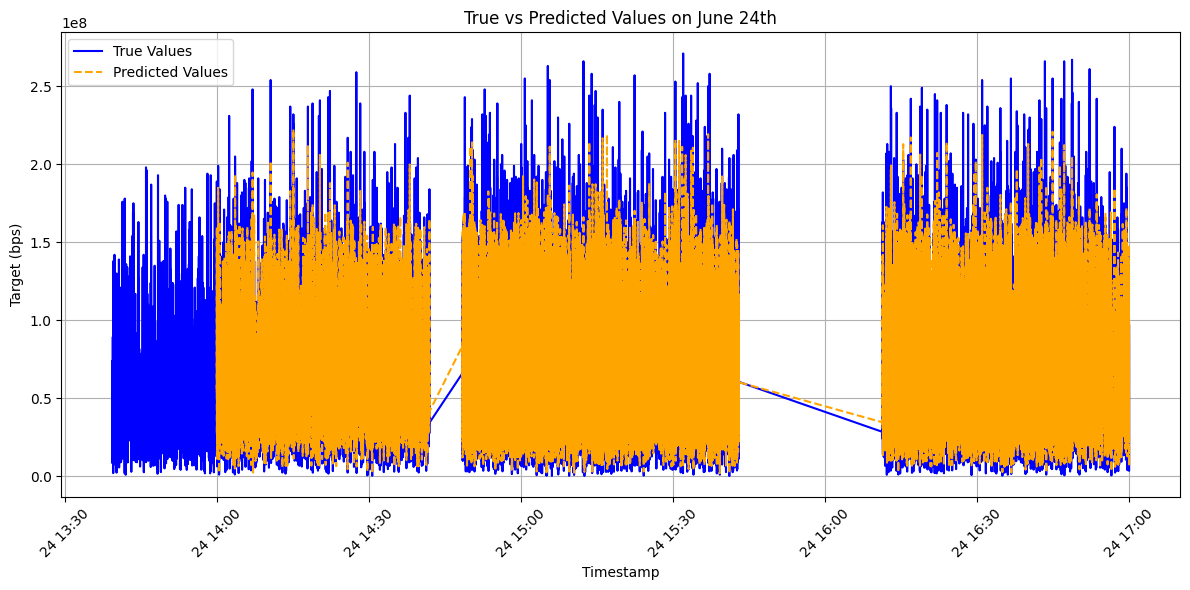

In [ ]:

train_sorted = train_data.sort_values(by="timestamp")
test_sorted = test_data.sort_values(by="timestamp")

time_series_test_df = pd.DataFrame({
    "timestamp": test_sorted["timestamp"],
    "true_values": y_test.values,
    "predicted_values": y_pred
})

time_series_train_df = pd.DataFrame({
    "timestamp": train_sorted["timestamp"],
    "true_values": y_train.values,
    "predicted_values": np.nan  # Train set won't have predictions
})

complete_time_series = pd.concat([time_series_train_df, time_series_test_df]).sort_values(by="timestamp")
june_24_data = complete_time_series[
    complete_time_series["timestamp"].dt.date == datetime.date(2021, 6, 24)
]
plt.figure(figsize=(12, 6))
plt.plot(june_24_data["timestamp"], june_24_data["true_values"], label="True Values", color="blue")
plt.plot(june_24_data["timestamp"], june_24_data["predicted_values"], label="Predicted Values", linestyle="--", color="orange")
plt.title("True vs Predicted Values on June 24th")
plt.xlabel("Timestamp")
plt.ylabel("Target (bps)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
